# Project 1: K-Nearest-Neighbor Regression

This project uses the pre-defined function `KNeighborsRegressor` from `sklearn.neighbors` library to predict $\hat{y}$ value. As per the requirement of the project we generate the predictions with neighbors K = 1, 3, and 50. Then, plot the predictions alongwith the generated dataset to see the accuracy. 
The `KNeighborsRegressor` and `matplotlib.pyplot` functions have been wrapped in user-defined function to avoid re-writing unnecessary code for each graph.

In [150]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
# plt.rcParams['text.usetex'] = True

In [155]:
# Consider a single dimension (variable) X. Obtain N = 100 iid samples x1; x2;... of X
# uniformly randomly between 1 and 10
# df = pd.DataFrame(np.random.uniform(1,10,100), np.random.normal(0,.1,100), columns=['x', 'noise'])
# df
# Set seed to reproduce consistent results
np.random.seed(1994)
# Generate N = 100 iid samples uniformly randomly between 1 and 10
x_data = np.random.uniform(1,10,100)
# Generate Gaussian noise (with mean 0, standard deviation 0.1)
noise = np.random.normal(0,.1,100)
# Create a datafram with x_data and y values as log of x + Gaussian noise
df = pd.DataFrame({'x' : x_data, 'y' : np.log(x_data) + noise})
# Sort by x column for convenience in plotting
df = df.sort_values(by='x')
df

,x,y
69,1.049902,0.069525
73,1.073570,-0.209494
1,1.139239,0.210812
79,1.156407,0.006385
35,1.245239,0.387111
...,...,...
63,9.625312,2.209646
41,9.664161,2.287826
86,9.665684,2.058775
67,9.694484,2.306183


### User defined wrapper functions `my_knn` and `plot_knn`

In [151]:
def my_knn(dataset, K=1, weight_method='uniform'):
    neigh = KNeighborsRegressor(n_neighbors=K, weights=weight_method)
    neigh.fit(dataset[['x']], dataset[['y']])
    new_dict={}
    for i in range(1,11,2):
        new_dict[i]= neigh.predict([[i]]).flatten()
    
    new_df = pd.DataFrame.from_dict(new_dict )
    return new_df.transpose()
def plot_knn(knn_df, color='r'):
    plt.plot(df.x, df.y, label = 'generated dataset')
    plt.plot(knn_df[0], linestyle='--', marker='o',color=color, label='predicted values ')
    plt.legend()

## Plots based on equal contribution from neighbors

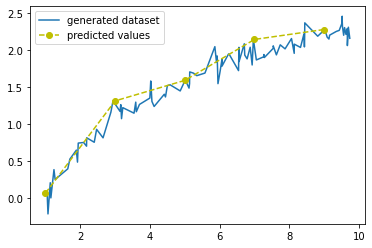

In [127]:
# Equal contributions by neighbors and K = 1
df_k1_uniform = my_knn(df, 1, 'uniform')
plot_knn(df_k1_uniform, 'y')

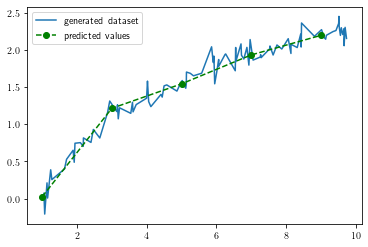

In [129]:
# Equal contributions by neighbors and K = 3
df_k3_uniform = my_knn(df, 3, 'uniform')
plot_knn(df_k3_uniform, 'g')

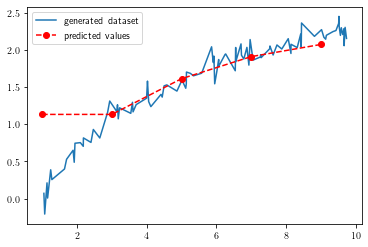

In [130]:
# Equal contributions by neighbors and K = 50
df_k50_uniform = my_knn(df, 50, 'uniform')
plot_knn(df_k50_uniform, 'r')

## Plots based on contribution inversely proportion to distance from neighbors

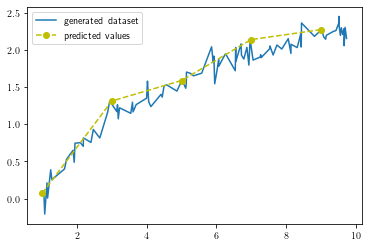

In [131]:
# Inversly proportion to distance and K = 1
df_k1_distance = my_knn(df, 1, 'distance')
plot_knn(df_k1_distance, 'y')

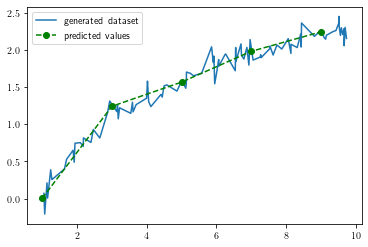

In [132]:
# Inversly proportion to distance and K = 3
df_k3_distance = my_knn(df, 3, 'distance')
plot_knn(df_k3_distance, 'g')

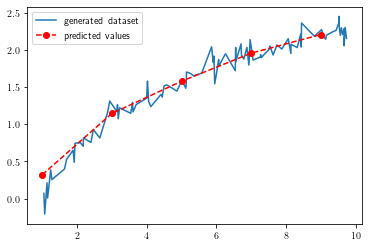

In [133]:
# Inversly proportion to distance and K = 50
df_k50_distance = my_knn(df, 50, 'distance')
plot_knn(df_k50_distance, 'r')

Plot based on all N-point contribution, with each contribution proportional to $e^{-\frac12d^2}$

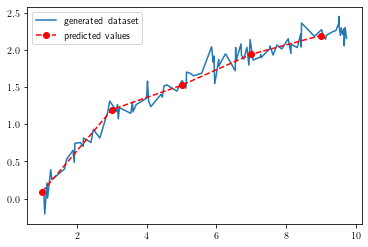

In [149]:
# Define a callable function that accepts array of distances to all points and returns
# array of weights based on a custom function
def callable_func(dist_array):
    return np.e**(-(1/2)*np.power(dist_array,2))

# Using KNN with the callable function
dataset = df
neigh = KNeighborsRegressor(weights=callable_func)
neigh.fit(dataset[['x']], df[['y']])
new_dict={}
for i in range(1,11,2):
    new_dict[i]= neigh.predict([[i]]).flatten()

new_df = pd.DataFrame.from_dict(new_dict )
df_n_point = new_df.transpose()
plot_knn(df_n_point, 'r')